# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, DistanceMetric, NearestNeighbors
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


##1. Preprocssing / EDA

In [4]:
df.shape

(4998, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [6]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [7]:
df1 = df.drop(['Product_Category_2','Product_Category_3', 'User_ID'], axis = 1)

In [11]:
categorical = ['Gender', 'Age', 'Occupation', 'City_Category', 
                 'Stay_In_Current_City_Years', 'Product_Category_1']

encoder = OneHotEncoder().fit(df1[categorical])    
encoder.get_feature_names(categorical)   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9',
  

In [12]:
endcoded_data = pd.DataFrame(encoder.transform(df1[categorical]).toarray(),
                               index = df1.index,
                               columns = encoder.get_feature_names(categorical))  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
df2 = pd.concat([df1, endcoded_data], sort = False, axis = 1)

In [16]:
df2 = df2.drop(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
                  'Stay_In_Current_City_Years', 'Product_Category_1'], axis = 1)


In [18]:
X = df2.drop(['Purchase'], axis = 1)
y = df2.Purchase

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

##2. KNN 구현 & 파라미터 튜닝

In [26]:
import matplotlib.pyplot as plt


In [24]:
k_param=range(1,30)
train_acc_list=[]
test_acc_list=[]

for k in k_param:
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_acc_list.append(knn.score(X_train,y_train))
  test_acc_list.append(knn.score(X_test,y_test))

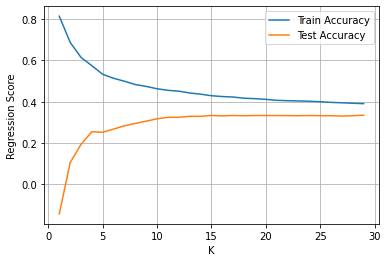

In [28]:
plt.plot(k_param, train_acc_list, label = "Train Accuracy")
plt.plot(k_param, test_acc_list, label = "Test Accuracy")
plt.xlabel("K")
plt.ylabel("Regression Score")
plt.grid()
plt.legend()
plt.show()